# Preprocessing

###### The purpose of this part is to prepare dataset for modelling. Only the problems will be cared which prevent to build models

### Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

### Import Datasets

In [7]:
df = pd.read_csv("train.csv")
print( f'The dataset includes {df.shape[0]} rows and {df.shape[1]} columns')
df = df.drop("Id" , axis=1)
df.head()

The dataset includes 1460 rows and 81 columns


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Total number of NaNs = 6965
 19 columns includes NaNs.
 Which are : Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


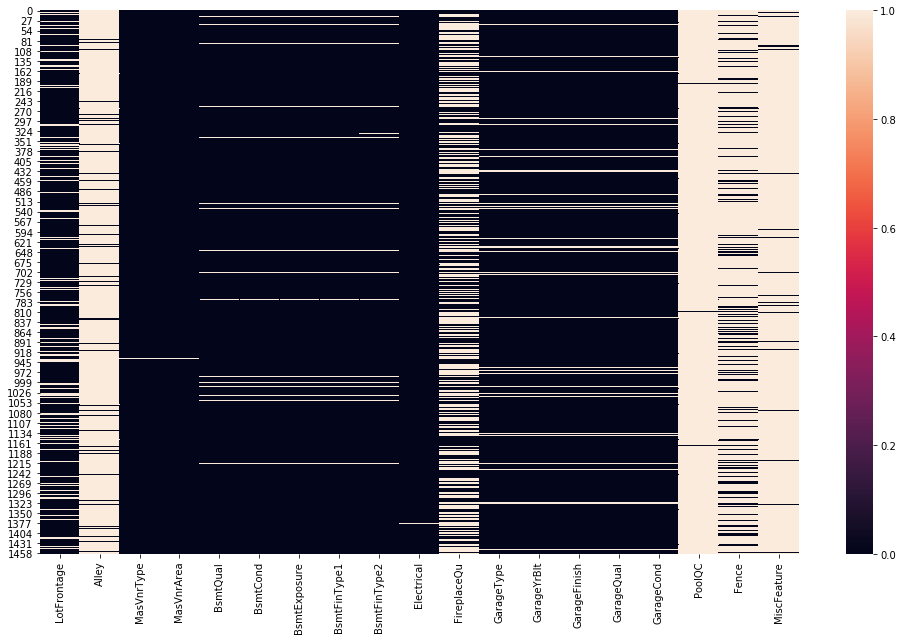

In [9]:
print(f'Total number of NaNs = {df.isnull().sum().sum()}')
df_col_na = df.loc[:,df.isnull().sum()[df.isnull().sum()>0].index]
print(f' {df_col_na.shape[1]} columns includes NaNs.\n Which are : {df_col_na.columns}')
plt.figure(figsize=(17,10))
sns.heatmap(df_col_na.isnull())

###### NA values show the same pattern in the related features. Data description also shows that it is typed as NA if a house has no the property, even for the numeric features. In this part, these values will be cared.

In [10]:
dfna = df.copy()

In [11]:
# Alley NaN's means no alley access
dfna.Alley = df.Alley.replace(to_replace= np.nan , value= "NoAll")
print(dfna.Alley.isnull().sum())
dfna.Alley.head()

0


0    NoAll
1    NoAll
2    NoAll
3    NoAll
4    NoAll
Name: Alley, dtype: object

###### In the cell above Alley feature is typed as 'NoAll' instead of NaN if the house has no Alley

In [12]:
dfna.iloc[:, df.columns.get_loc("BsmtQual"):df.columns.get_loc("BsmtFinType2")+1] = dfna.iloc[:, df.columns.get_loc("BsmtQual"):df.columns.get_loc("BsmtFinType2")+1].fillna("NoB")
print(dfna.iloc[:, df.columns.get_loc("BsmtQual"):df.columns.get_loc("BsmtFinType2")+1].isnull().sum())
dfna.iloc[:, df.columns.get_loc("BsmtQual"):df.columns.get_loc("BsmtFinType2")+1].head()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
dtype: int64


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
0,Gd,TA,No,GLQ,706,Unf
1,Gd,TA,Gd,ALQ,978,Unf
2,Gd,TA,Mn,GLQ,486,Unf
3,TA,Gd,No,ALQ,216,Unf
4,Gd,TA,Av,GLQ,655,Unf


In [13]:
# 1 tane missing vardı. En çok classla imput ettim.
dfna.Electrical[dfna.Electrical.isnull()] = "SBrkr"
dfna.Electrical.isnull().sum()

0

In [14]:
print(f'NaN number : {dfna.FireplaceQu.isnull().sum()}')
dfna.FireplaceQu = dfna.FireplaceQu.fillna("NoF")
print(f'NaN number : {dfna.FireplaceQu.isnull().sum()}')

NaN number : 690
NaN number : 0


In [15]:
print(f'# of Missing in each columns depends on Garage is {dfna.GarageType.isnull().sum()}')
dfna.loc[:,["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]] = dfna.loc[:,["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]].fillna("NoG")  
dfna.loc[1453,["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]].fillna("NoG")

# of Missing in each columns depends on Garage is 81


GarageType      NoG
GarageYrBlt     NoG
GarageFinish    NoG
GarageQual      NoG
GarageCond      NoG
Name: 1453, dtype: object

In [16]:
print(f'# of Missing in PoolQC column is {dfna.PoolQC.isnull().sum()}')
dfna.PoolQC = dfna.PoolQC.fillna("NoP")
print(f'# of Missing in PoolQC column is {dfna.PoolQC.isnull().sum()}')

# of Missing in PoolQC column is 1453
# of Missing in PoolQC column is 0


In [17]:
print(f'# of Missing in PoolQC column is {dfna.Fence.isnull().sum()}')
dfna.Fence = dfna.Fence.fillna("NoF")
print(f'# of Missing in PoolQC column is {dfna.Fence.isnull().sum()}')

# of Missing in PoolQC column is 1179
# of Missing in PoolQC column is 0


In [18]:
print(f'# of Missing in PoolQC column is {dfna.MiscFeature.isnull().sum()}')
dfna.MiscFeature = dfna.MiscFeature.fillna("NoM")
print(f'# of Missing in PoolQC column is {dfna.MiscFeature.isnull().sum()}')

# of Missing in PoolQC column is 1406
# of Missing in PoolQC column is 0


In [19]:
print(f'MasVnrType NaN number :{dfna.MasVnrType.isnull().sum()}\nMasVnrArea NaN number :{dfna.MasVnrArea.isnull().sum()}')
dfna.MasVnrType = dfna.MasVnrType.fillna("None")
dfna.MasVnrArea = dfna.MasVnrArea.fillna(float(0))
print(f'MasVnrType NaN number :{dfna.MasVnrType.isnull().sum()}\nMasVnrArea NaN number :{dfna.MasVnrArea.isnull().sum()}')


MasVnrType NaN number :8
MasVnrArea NaN number :8
MasVnrType NaN number :0
MasVnrArea NaN number :0


Total number of NaNs = 259
 19 columns includes NaNs.
 Which are : Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


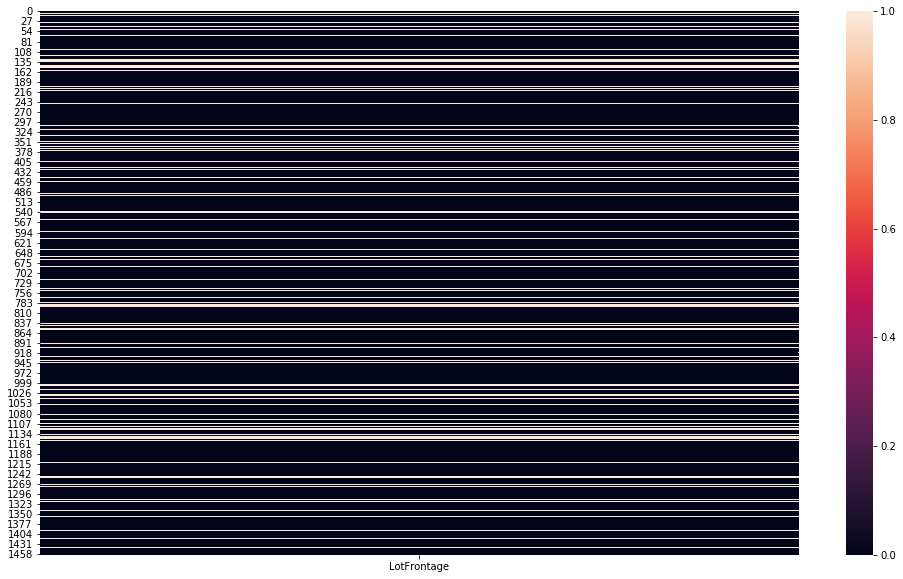

In [20]:
print(f'Total number of NaNs = {df.isnull().sum().sum()}')
dfna_col_na = dfna.loc[:,dfna.isnull().sum()[dfna.isnull().sum()>0].index]
print(f' {df_col_na.shape[1]} columns includes NaNs.\n Which are : {df_col_na.columns}')
plt.figure(figsize=(17,10))
sns.heatmap(dfna_col_na.isnull())


######   The feature 'LotFrontage' is separeted from the others since the description does not claim the same case for  this one. So LotFrontage will be discarded in the modelling part beacuse it contaions many Na values that will prevent to take  information safely.